##Part 1

Importing libraries

In [65]:
import numpy as np
import pandas as pd
import cv2


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
from tensorflow.keras import datasets
from keras.utils.np_utils import to_categorical
from keras_preprocessing import image

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten,MaxPooling2D,Conv2D
from keras.utils import np_utils
from keras_preprocessing.image import  ImageDataGenerator, load_img

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

Importing training dataset(train Part 1)

In [ ]:
!wget https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip

In [ ]:
#Unzipping 
!unzip trainPart1.zip

Archive:  trainPart1.zip
   creating: train/
   creating: train/Sample002/
  inflating: train/Sample002/img002-048.png  
  inflating: train/Sample002/img002-050.png  
  inflating: train/Sample002/img002-006.png  
  inflating: train/Sample002/img002-004.png  
  inflating: train/Sample002/img002-053.png  
  inflating: train/Sample002/img002-045.png  
  inflating: train/Sample002/img002-052.png  
  inflating: train/Sample002/img002-047.png  
  inflating: train/Sample002/img002-020.png  
  inflating: train/Sample002/img002-009.png  
  inflating: train/Sample002/img002-011.png  
  inflating: train/Sample002/img002-013.png  
  inflating: train/Sample002/img002-034.png  
  inflating: train/Sample002/img002-038.png  
  inflating: train/Sample002/img002-024.png  
  inflating: train/Sample002/img002-025.png  
  inflating: train/Sample002/img002-018.png  
  inflating: train/Sample002/img002-032.png  
  inflating: train/Sample002/img002-028.png  
  inflating: train/Sample002/img002-001.png  
  inf

Reading a image

<function matplotlib.pyplot.show>

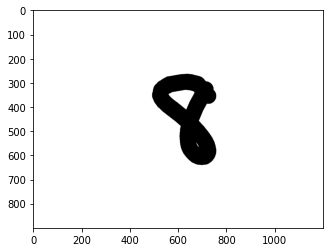

In [84]:
#Checking few items of imported dataset
img = mpimg.imread('/content/train/Sample009/img009-005.png')
imgplot = plt.imshow(img)
plt.show

In [85]:
im = cv2.imread('/content/train/Sample009/img009-005.png')
print(type(im))   #printing "type" of item of dataset
print(im.shape)  #printing shape of item of dataset
print(type(im.shape))   # printing "type" of shape of item of dataset
# 900 pixel is height and 1200 pixel is width

<class 'numpy.ndarray'>
(900, 1200, 3)
<class 'tuple'>


Created New Folder manually in google colab named "ProcessedData"

In [86]:
#After creating ProcessedData Folder in google colab spliting training data into train , test and validation data
#Creating test-train split
input_folder = "/content/train"
output = "/content/ProcessedData"
splitfolders.ratio(input_folder , output , seed = 1337 , ratio = (.8,.1,.1))

Copying files: 2480 files [00:00, 4853.49 files/s]


Now Folder named "ProcessedData" contains 3 sub folders named : test , train and valid . Each of these folders contain 60% , 20% , 20% of train(trainPart1) data respectively . 

Initializing the parameters

In [87]:
img_height , img_width   = 400, 400
train_dir = r"/content/ProcessedData/train"
test_dir = r"/content/ProcessedData/test"
valid_dir = r"/content/ProcessedData/val"

Now storing the labels of data in a List(named sorted_list)

In [88]:
import os
A = []
path = '/content/ProcessedData'
for root, dirs,files in os.walk('/content/train'):
   for name in dirs:
      A.append(os.path.join(root, name))

In [89]:
A

['/content/train/Sample062',
 '/content/train/Sample054',
 '/content/train/Sample002',
 '/content/train/Sample015',
 '/content/train/Sample030',
 '/content/train/Sample055',
 '/content/train/Sample008',
 '/content/train/Sample046',
 '/content/train/Sample041',
 '/content/train/Sample042',
 '/content/train/Sample035',
 '/content/train/Sample021',
 '/content/train/Sample059',
 '/content/train/Sample061',
 '/content/train/Sample052',
 '/content/train/Sample057',
 '/content/train/Sample020',
 '/content/train/Sample053',
 '/content/train/Sample018',
 '/content/train/Sample003',
 '/content/train/Sample040',
 '/content/train/Sample032',
 '/content/train/Sample010',
 '/content/train/Sample019',
 '/content/train/Sample034',
 '/content/train/Sample009',
 '/content/train/Sample043',
 '/content/train/Sample031',
 '/content/train/Sample005',
 '/content/train/Sample012',
 '/content/train/Sample013',
 '/content/train/Sample023',
 '/content/train/Sample029',
 '/content/train/Sample036',
 '/content/tra

In [90]:
C=[]
for x in A: 
    C.append(x.replace('/content/train/',''))
sorted_list = sorted(C)

In [91]:
sorted_list    #stores all labels of data

['Sample001',
 'Sample002',
 'Sample003',
 'Sample004',
 'Sample005',
 'Sample006',
 'Sample007',
 'Sample008',
 'Sample009',
 'Sample010',
 'Sample011',
 'Sample012',
 'Sample013',
 'Sample014',
 'Sample015',
 'Sample016',
 'Sample017',
 'Sample018',
 'Sample019',
 'Sample020',
 'Sample021',
 'Sample022',
 'Sample023',
 'Sample024',
 'Sample025',
 'Sample026',
 'Sample027',
 'Sample028',
 'Sample029',
 'Sample030',
 'Sample031',
 'Sample032',
 'Sample033',
 'Sample034',
 'Sample035',
 'Sample036',
 'Sample037',
 'Sample038',
 'Sample039',
 'Sample040',
 'Sample041',
 'Sample042',
 'Sample043',
 'Sample044',
 'Sample045',
 'Sample046',
 'Sample047',
 'Sample048',
 'Sample049',
 'Sample050',
 'Sample051',
 'Sample052',
 'Sample053',
 'Sample054',
 'Sample055',
 'Sample056',
 'Sample057',
 'Sample058',
 'Sample059',
 'Sample060',
 'Sample061',
 'Sample062']

To check shaoe of image

In [92]:
import keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

Generating Images to train the model

In [93]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), 
                                                    batch_size= 16 , class_mode = 'categorical')#will generate training generator data
validation_generator = test_datagen.flow_from_directory(valid_dir , target_size = (img_width , img_height) ,
                                                        batch_size = 16,  class_mode = 'categorical' )#will generate testing generator data

Found 1984 images belonging to 62 classes.
Found 744 images belonging to 62 classes.


Displaying classes of test_generator

In [94]:
validation_generator.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

Displaying classes of train_generator

In [95]:
train_generator.classes

array([ 0,  0,  0, ..., 61, 61, 61], dtype=int32)

Visual Representation of ImageDataGenerator

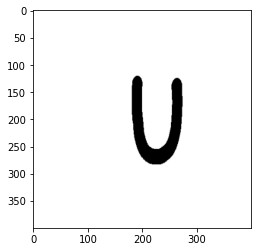

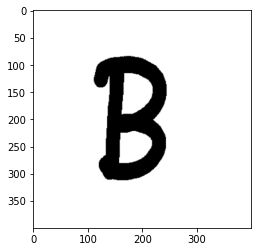

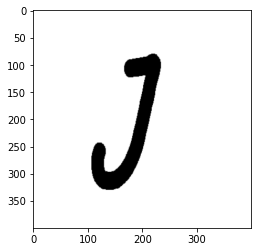

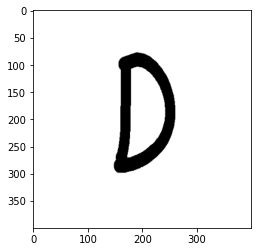

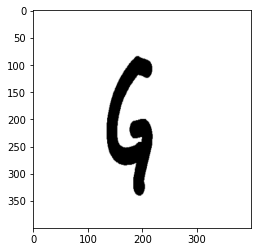

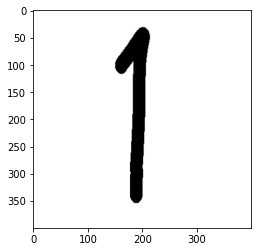

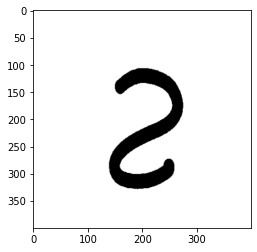

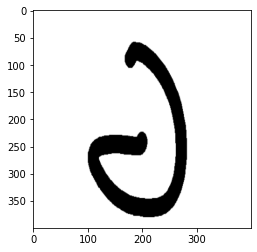

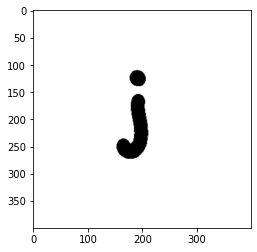

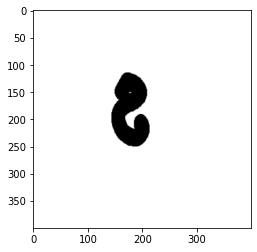

In [96]:
for i in range(0,10):
     for X_batch , Y_batch in train_generator:
         image = X_batch[0]
         plt.imshow(image)
         break
     plt.show()    

Building the basic CNN model

Layers in CNN:

---



1.   Convolution Layer
2.   ReLu Layer
3.   Pooling Layer
4.   Fully Connected Layer(Dense)




In [97]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape))   #Convolution layer with 64 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu layer
model.add(MaxPooling2D(pool_size=(2,2)))                #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(32, (3, 3)))                           #Convolution layer with 32 neurons and 3*3 filter 
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(16, (3, 3)))                           #Convolution layer with 16 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size



model.add(Flatten())                                    #To convert pixel matrix into 1D array
model.add(Activation('relu'))                           #ReLu Layer
model.add(Dropout(0.2))                                 #To prevent overfitting
model.add(Dense(1))                                     #Adds fully connected layer to neural network
model.add(Activation('softmax'))                        #softmax function is used as activation function for multiclass classification
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 398, 398, 64)      1792      
_________________________________________________________________
activation_15 (Activation)   (None, 398, 398, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 197, 197, 32)      18464     
_________________________________________________________________
activation_16 (Activation)   (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 16)       

Choosing Optimizer , Loss function

In [98]:
model.compile(optimizer="rmsprop",loss= "categorical_crossentropy" , metrics = ['accuracy']) 
# categorical_crossentropy used for multiclass classification
# rmsprop is used as it is a gradient based optimization technique . It prevents gradient from either vanishing or exploding
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 398, 398, 64)      1792      
_________________________________________________________________
activation_15 (Activation)   (None, 398, 398, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 197, 197, 32)      18464     
_________________________________________________________________
activation_16 (Activation)   (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 16)       

Displaying various samples(zoomed , flipped etc) of image generated 

Trainning CNN model 

In [100]:
training = model.fit(train_generator, steps_per_epoch= 14, epochs = 11 , 
                               validation_data = validation_generator ,  batch_size = 16)

Epoch 1/11
14/14 [==============================] - 26s 2s/step - loss: 5.3525 - accuracy: 0.9827 - val_loss: 4.1258 - val_accuracy: 0.9839
Epoch 2/11
14/14 [==============================] - 25s 2s/step - loss: 4.1202 - accuracy: 0.9839 - val_loss: 4.0992 - val_accuracy: 0.9839
Epoch 3/11
14/14 [==============================] - 25s 2s/step - loss: 4.1827 - accuracy: 0.9839 - val_loss: 3.9887 - val_accuracy: 0.9839
Epoch 4/11
14/14 [==============================] - 25s 2s/step - loss: 4.0179 - accuracy: 0.9839 - val_loss: 3.8370 - val_accuracy: 0.9839
Epoch 5/11
14/14 [==============================] - 25s 2s/step - loss: 3.8889 - accuracy: 0.9839 - val_loss: 3.6855 - val_accuracy: 0.9839
Epoch 6/11
14/14 [==============================] - 25s 2s/step - loss: 3.6380 - accuracy: 0.9839 - val_loss: 3.5414 - val_accuracy: 0.9840
Epoch 7/11
14/14 [==============================] - 25s 2s/step - loss: 3.4285 - accuracy: 0.9838 - val_loss: 3.3774 - val_accuracy: 0.9840
Epoch 8/11
14/14 [==

In [101]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Plotting model accuracy and model loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


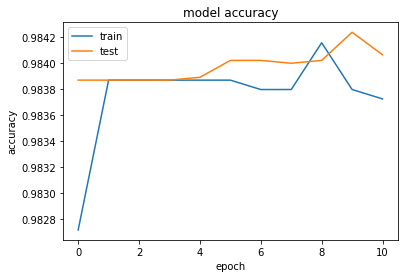

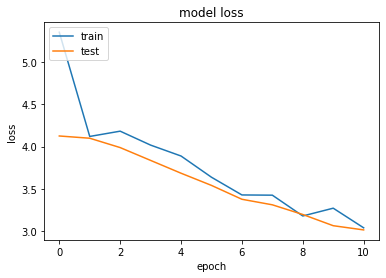

In [102]:
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

Testing over some images

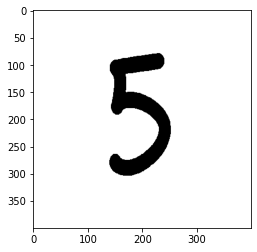

Sample006
1.0


In [133]:
from keras.preprocessing.image import img_to_array, load_img
img = load_img("/content/ProcessedData/test/Sample006/img006-012.png",target_size=input_shape)
plt.imshow(img)
plt.show()
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
r = np.vstack([X])
val = model.predict(r)
a = 0
c = 0
for i in range(0,62):
    if val[0][i] > a :
        a = val[0][i]
        k = c
    else:
        c = c+1
preds = sorted_list[k]
prob = val[0][k]
print(preds)
print(prob)

In [134]:
val

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.7485414e-20,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [136]:
print(val.shape)

(1, 62)


References - 


*   https://keras.io/api/
*   https://stackoverflow.com/
*   https://github.com/
*   https://www.geeksforgeeks.org/ 


##Part 2

Uploading MNSIT dataset ( containing first 10 subfolders of trainPart1) (Manually)

In [168]:
#Directly upload the MNSIT folder provided (manually)

In [162]:
mn =  "/content/gdrive/MyDrive/MNIST" #change the path accordingly

In [166]:
im = cv2.imread('/content/gdrive/MyDrive/MNIST/Sample002/img002-001.png')
print(type(im))   #printing "type" of item of dataset
print(im.shape)  #printing shape of item of dataset
print(type(im.shape))   # printing "type" of shape of item of dataset
# 900 pixel is height and 1200 pixel is width

<class 'numpy.ndarray'>
(900, 1200, 3)
<class 'tuple'>


In [169]:
#Creating test-train split
input_folder = "/content/gdrive/MyDrive/MNIST"
output = "/content/MNSITProcessed" #Created new folder manually (named MNISTProcessed)
splitfolders.ratio(input_folder , output , seed = 1337 , ratio = (.8,.1,.1))

Copying files: 400 files [00:00, 430.75 files/s]


In [189]:
S = sorted_list[0:10] #For labels of MNIST dataset

In [173]:
import keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

In [174]:
train_dir = r"/content/MNISTProcessed/train"
test_dir = r"/content/MNISTProcessed/test"
valid_dir = r"/content/MNISTProcessed/val"

In [178]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), 
                                                    batch_size= 8 , class_mode = 'categorical')#will generate training generator data
validation_generator = test_datagen.flow_from_directory(valid_dir , target_size = (img_width , img_height) ,
                                                        batch_size = 8,  class_mode = 'categorical' )#will generate testing generator data

Found 320 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape))   #Convolution layer with 64 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu layer
model.add(MaxPooling2D(pool_size=(2,2)))                #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(32, (3, 3)))                           #Convolution layer with 32 neurons and 3*3 filter 
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(16, (3, 3)))                           #Convolution layer with 16 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size



model.add(Flatten())                                    #To convert pixel matrix into 1D array
model.add(Activation('relu'))                           #ReLu Layer
model.add(Dropout(0.2))                                 #To prevent overfitting
model.add(Dense(1))                                     #Adds fully connected layer to neural network
model.add(Activation('softmax'))                        #softmax function is used as activation function for multiclass classification
model.summary()

In [ ]:
model.compile(optimizer="rmsprop",loss= "categorical_crossentropy" , metrics = ['accuracy']) 
# categorical_crossentropy used for multiclass classification
# rmsprop is used as it is a gradient based optimization technique . It prevents gradient from either vanishing or exploding
model.summary()

In [ ]:
training = model.fit(train_generator, steps_per_epoch= 14, epochs = 10 , 
                               validation_data = validation_generator ,  batch_size = 8)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


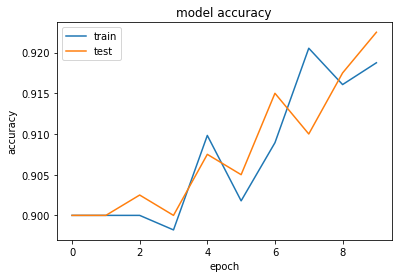

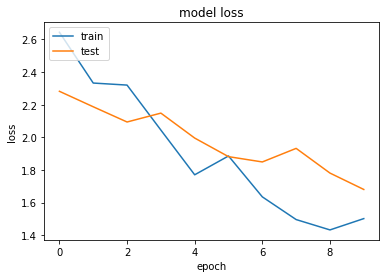

In [183]:
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

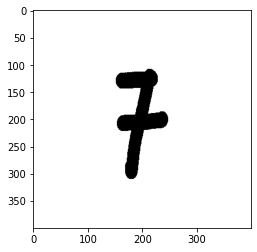

Sample008
1.0


In [188]:
from keras.preprocessing.image import img_to_array, load_img
img = load_img("/content/MNISTProcessed/test/Sample008/img008-031.png",target_size=input_shape)
plt.imshow(img)
plt.show()
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
r = np.vstack([X])
val = model.predict(r)
a = 0
c = 0
for i in range(0,10):
    if val[0][i] > a :
        a = val[0][i]
        k = c
    else:
        c = c+1
preds = S[k]
prob = val[0][k]
print(preds)
print(prob)

##Part 3

In [ ]:
!wget https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip

In [192]:
!unzip mnistTask3.zip

In [194]:
im = cv2.imread('/content/mnistTask/0/image_000039.jpg')
print(type(im))   #printing "type" of item of dataset
print(im.shape)  #printing shape of item of dataset
print(type(im.shape))   # printing "type" of shape of item of dataset
# 900 pixel is height and 1200 pixel is width

<class 'numpy.ndarray'>
(28, 28, 3)
<class 'tuple'>


In [195]:
#Creating test-train split
input_folder = "/content/mnistTask"
output = "/content/P3" #Created new folder manually (named P3)
splitfolders.ratio(input_folder , output , seed = 1337 , ratio = (.8,.1,.1))

Copying files: 60000 files [00:10, 5454.71 files/s]


In [213]:
img_width, img_height = 28,28

In [214]:
#For labels of MNIST dataset
part3=[]
for k in range(0,10):
    part3.append(k) 

In [215]:
part3

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [216]:
import keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

In [217]:
train_dir = r"/content/P3/train"
test_dir = r"/content/P3/test"
valid_dir = r"/content/P3/val"

In [218]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), 
                                                    batch_size= 64 , class_mode = 'categorical')#will generate training generator data
validation_generator = test_datagen.flow_from_directory(valid_dir , target_size = (img_width , img_height) ,
                                                        batch_size = 64,  class_mode = 'categorical' )#will generate testing generator data

Found 47997 images belonging to 10 classes.
Found 5994 images belonging to 10 classes.


In [219]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape))   #Convolution layer with 64 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu layer
model.add(MaxPooling2D(pool_size=(2,2)))                #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(32, (3, 3)))                           #Convolution layer with 32 neurons and 3*3 filter 
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(16, (3, 3)))                           #Convolution layer with 16 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size



model.add(Flatten())                                    #To convert pixel matrix into 1D array
model.add(Activation('relu'))                           #ReLu Layer
model.add(Dropout(0.2))                                 #To prevent overfitting
model.add(Dense(1))                                     #Adds fully connected layer to neural network
model.add(Activation('softmax'))                        #softmax function is used as activation function for multiclass classification
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
activation_35 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
activation_36 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 16)         

In [220]:
model.compile(optimizer="rmsprop",loss= "categorical_crossentropy" , metrics = ['accuracy']) 
# categorical_crossentropy used for multiclass classification
# rmsprop is used as it is a gradient based optimization technique . It prevents gradient from either vanishing or exploding
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
activation_35 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
activation_36 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 16)         

In [ ]:
training = model.fit(train_generator, steps_per_epoch= 14, epochs = 10 , 
                               validation_data = validation_generator ,  batch_size = 64)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


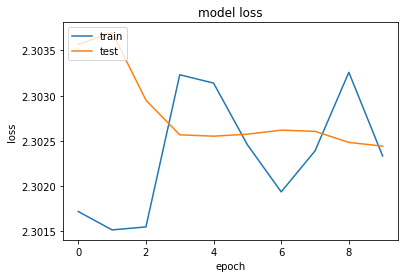

In [223]:
print(training.history.keys())
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

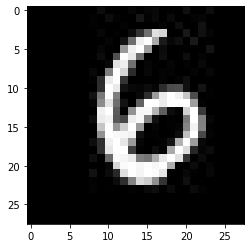

3
0.14014323


In [225]:
from keras.preprocessing.image import img_to_array, load_img
img = load_img("/content/P3/test/2/image_000218.jpg",target_size=input_shape)
plt.imshow(img)
plt.show()
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
r = np.vstack([X])
val = model.predict(r)
a = 0
c = 0
for i in range(0,10):
    if val[0][i] > a :
        a = val[0][i]
        k = c
    else:
        c = c+1
preds = part3[k]
prob = val[0][k]
print(preds)
print(prob)